# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [43]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [45]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 가설(Hypothesis)
### 가설 1. 기상과 수요량의 관계
- 자전거를 타기 좋은 날씨인가? = 걷기 좋지 않은 날씨인가?
- 날씨가 덥고(30도씨 이상) 습도가 높을수록(60% 이상)일수록 수요량은 증가할 것이다.

### 가설 2. 시간대별 수요량의 증감관계
- 출근(08 ~ 10시)시간에 수요량이 증가
- 퇴근(17 ~ 19시)시간에 수요량이 증가
- 공백 시간(10 ~ 17시)에는 누가 주로 수요를 하는가?

### 가설 3. 풍량과 수요량 하락세의 관계
- 연휴(holiday)기간에는 장거리 여행을 떠날 것이므로 수요량이 줄어들 것이다
- 비가 오거나(Humidity 80% 이상), 풍량(windspeed)이 증가 할수록 자전거를 이용하지 않을까?
- 여전히 이용하는 사용자가 있다면 그에 대한 개선사항이 요구됨.

In [46]:
data['datetime'] = data['datetime'].astype('datetime64')
data['hour'] = data['datetime'].dt.hour

# 1 기상과 수요량의 관계(기온, 습도에 따른 회원별 수요량)

## 비회원 증가세

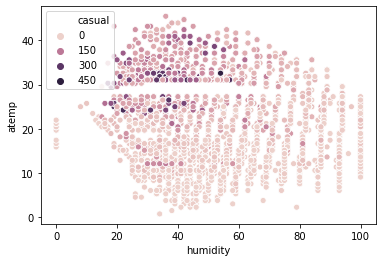

In [47]:
casual_growth = sns.scatterplot(x=data.humidity, y=data.atemp, data=data, hue=data.casual)


## 기존회원 증가세

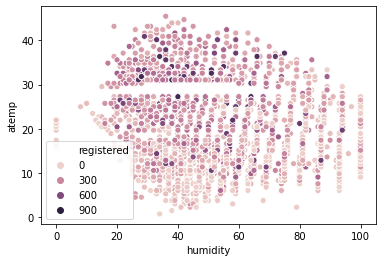

In [48]:
reg_growth = sns.scatterplot(x=data.humidity, y=data.atemp, data=data, hue=data.registered)

- 기온이 30도 이상일때 이용자 수가 급증하며, 평균 습도보다 낮은 20%의 습도에도 이용자가 늘어나는 것으로 보아 증가세와 습도는 크게 관련이 없는 것으로 보인다.
- 반면, 기온이 30도 이상 & 습도가 80% 이상일 때, 모든 회원들의 수요량이 줄어드는 것은 우천이므로 자전거를 탈 수 없는 것으로 보인다.
- 우천 시 운영하기 좋은 지붕이 있는 전기 스쿠터 렌트 추가사업 확장에 대한 고려

# 2. 시간과 수요량의 관계(출퇴근 시간과 그 사이 시간)

Text(0, 0.5, 'Registered')

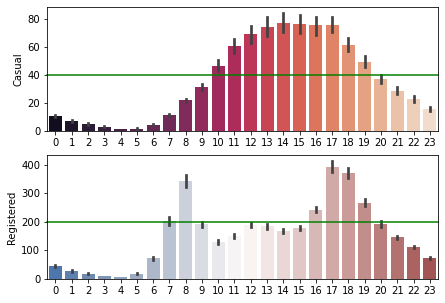

In [49]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=False)
y1 = data.casual
# Generate some sequential data
x = np.array(data['hour'])
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(40, color="g", clip_on=False)
ax1.set_ylabel("Casual")
y2 = data.registered
# Center the data to make it diverging
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(200, color="g", clip_on=False)
ax2.set_ylabel("Registered")

### 각 선은 전체 수요량의 절반을 나타낸다
### 출퇴근 시간 주이용자는 기존회원들
- 출퇴근시간 주 이용자는 회원들이며(20 ~ 40 대 사회활동 인구가 주 사용자)
- 각 출퇴근 시간에 정거장에 자전거가 전혀 없어 이용하지 못하는 사용자가 있는지 알아 볼 필요가 있는 것으로 보인다.
### 그 외 시간 이용자에 대한 추론
- 그 사이 시간에 이용자는 사회활동을 하지 않는 가정주부, 노령인구, 아동인구로 볼 수 있을 것이다.
- 위 이용자들이 회원으로 유입될 수 있는 개선책이 있는가?(예: 장을 보는 가정주부를 위한 바구니 부착 등)
- 이용량이 현저히 적은 3시 ~ 5시 까지는 자전거를 수거하고 점검할 수 있는 시간으로 활용할 수 있을 것으로 보인다.


# 3. 풍량과 수요량의 관계

### 강풍의 기준
- 풍속 14~21m/s 이상이거나 순간 풍속 20~25m/s 이상인 바람을 강풍이라고 분류함.

## 신규회원 이용률

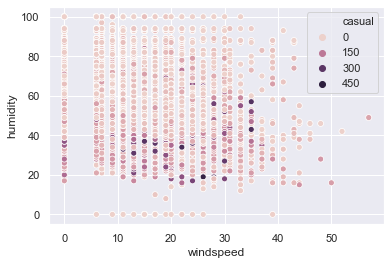

In [76]:
windspeed_casual = sns.scatterplot(x=data.windspeed, y=data.humidity, data=data, hue=data.casual)


## 기존회원 이용률

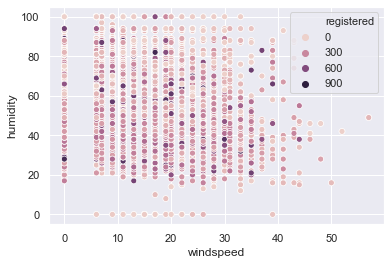

In [68]:
windspeed_reg = sns.scatterplot(x=data.windspeed, y=data.humidity, data=data, hue=data.registered)

- 비회원 이용자는 풍량 30 m/s 이상의 강풍일 때,  자전거를 이용하지 않는 반면, 기존회원 이용자들은 40m/s 이상의 강풍에서도 자전거를 사용했다.
- 앞서 출퇴근 이용자가 기존회원 이용자들인 점을 미뤄볼 때 기존회원들은 강풍이 치는 환경에서도 자전거를 이용했다.(=해야만 한다.)
- 기존회원의 경우, 습도가 80%가 넘는 환경에서도 사용한 것은 악천 기후에도 자전거를 사용하는 것으로 보인다.
- 기존회원들이 이용할 수 있는 악천후에도 이용할 수 있는 이동수단의 개발에 대한 고려사항

